# LendingClub Data Analysis

**Authors:**<br>
Júlio Sousa<br>
Emílio Banqueri<br>
Frederik Dethlefs<br>
José Gama<br>

In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import datetime
import math
import calendar
from bokeh.models.tools import HoverTool
from bokeh.plotting import figure 
from bokeh.io import output_notebook, show
from bokeh.models.tools import HoverTool
from bokeh.models import ColumnDataSource, DataRange1d, Plot, LinearAxis, Grid, Legend, LegendItem
import matplotlib.pyplot as plt
from plotnine import *
%matplotlib inline
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
from IPython.display import Image
import matplotlib.colors as mcolors

In [2]:
def percentage(x, pos):
    return f'{round(x,3)}%'
def percentage1(x, pos):
    return f'{round(x*100,1)}%'

def percentage2(x):
    return f'{x}%'


In [3]:
warnings.filterwarnings('ignore')
db = pd.read_csv('loan.csv')


In [4]:
loan_rate = pd.read_excel('RIFLPBCIANM60NM.xls')
tb_rate = pd.read_excel('treasury_bill.xlsx')
tb_rate['Date']= pd.to_datetime(tb_rate['Date'])
tb_rate['Interest Rate'] = tb_rate['Interest Rate']*100

# Introduction
Lending Club is currently the world’s largest P2P lending platform, after experiencing an exponential growth since its inception in 2006.<br>
The below listed main milestones that have fueled LC growth can review in below timeline.<br>
- Series A: 10M Dollar raised in 2007<br>
- Series C: 25M Dollar raised in 2011<br>
- IPO: Largest technological IPO of 2014 in US with 900M Dollar raised<br>
- Partnership with Google in 2015 to extend credit to companies that use Google business services<br>

**Warning: Run the code for the graphs bellow after the Data Curation steps.**


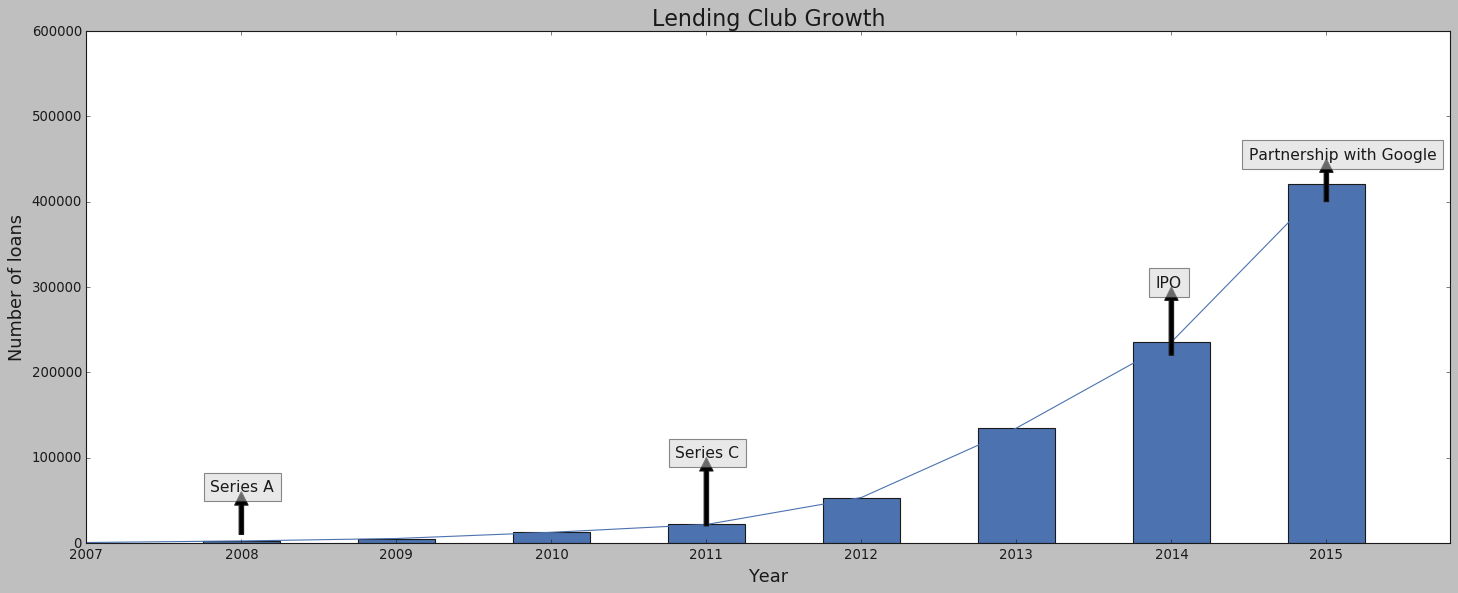

In [189]:
df['issue_month'],df['issue_year'] = df['issue_d'].str.split('-', 1).str
year_wise =df.groupby(by= ['issue_year'])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "Issued Loans", "issue_year" : "Year"},inplace=True)

with plt.style.context('classic'):

    ax =year_wise.plot(figsize=(22,8))
    year_wise.plot(kind='bar',figsize=(22,8),ax = ax)

    ax.set_title('Lending Club Growth',fontsize = 20)
    ax.set_xlabel('Year',fontsize = 16)
    ax.set_ylabel('Number of loans',fontsize = 16)

    text = '''Series A'''

    ax.annotate('', xy=(1, 60000), xytext=(1, 10000),
                arrowprops=dict(facecolor='black'))
    ax.text(0.8, 60000, text,
            bbox={'facecolor':'lightgrey', 'alpha':0.5, 'pad':6}, fontsize = 14)


    text = '''Series C'''

    ax.annotate('', xy=(4, 100000), xytext=(4, 20000),
                arrowprops=dict(facecolor='black'))
    ax.text(3.8, 100000, text,
            bbox={'facecolor':'lightgrey', 'alpha':0.5, 'pad':6}, fontsize = 14)


    text = '''IPO'''

    ax.annotate('', xy=(7, 300000), xytext=(7, 220000),
                arrowprops=dict(facecolor='black'))
    ax.text(6.9, 300000, text,
            bbox={'facecolor':'lightgrey', 'alpha':0.5, 'pad':6}, fontsize = 14)

    text = '''Partnership with Google'''

    ax.annotate('', xy=(8, 450000), xytext=(8, 400000),
                arrowprops=dict(facecolor='black'))
    ax.text(7.5, 450000, text,
            bbox={'facecolor':'lightgrey', 'alpha':0.5, 'pad':6}, fontsize = 14)

    plt.xlim(0, 8.8)
    plt.ylim(0, 600000)
    
    ax.legend().set_visible(False)
    plt.xticks(rotation=360)

    plt.show()

The company was born in Silicon Valley, as many other disruptive technological startups, and after its 4th year moved its HQ to downtown San Francisco. This fact is reflected in the strong presence that LC has in California in comparison to other states. 

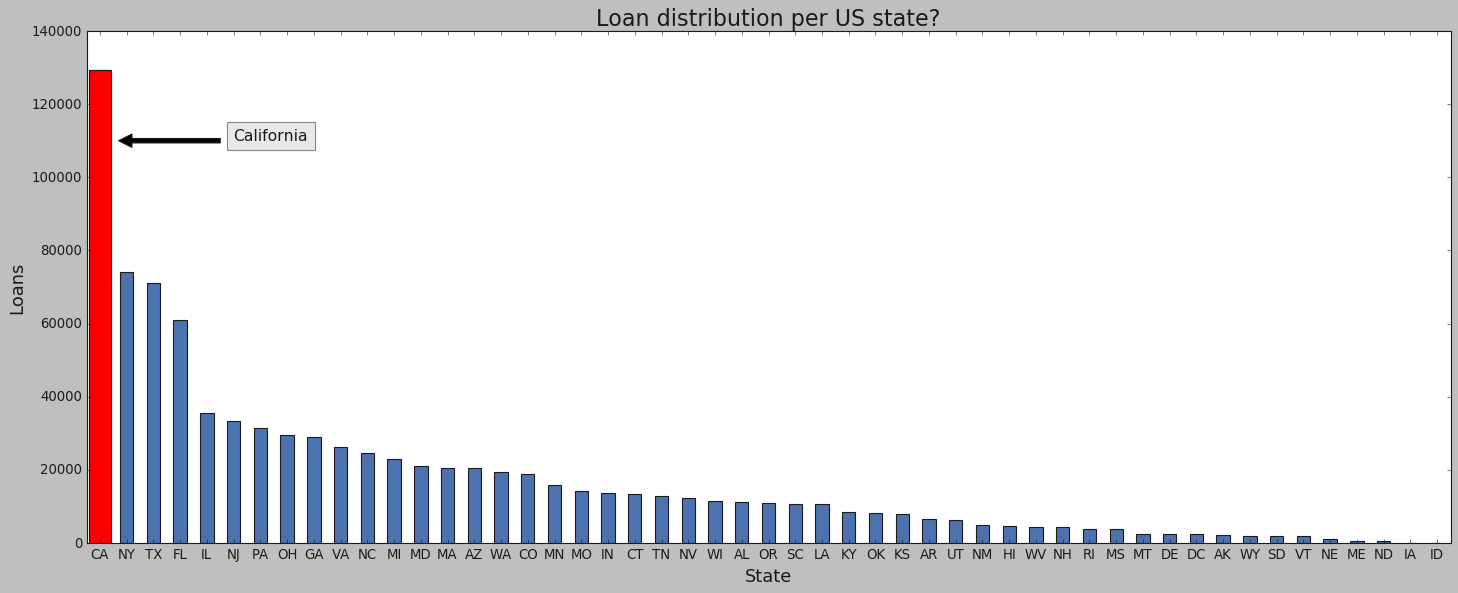

In [188]:
state =df.groupby(by= ['addr_state'])[['loan_status']].count().sort_values(by='loan_status', ascending = False)
state.rename(columns={"loan_status": "Issued Loans", "addr_state" : "State"},inplace=True)

with plt.style.context('classic'):

    ax = state.plot(figsize=(22,8), linestyle='None')
    state.plot(kind='bar',figsize=(22,8), ax=ax, linestyle='None')
    ax.bar([0], 129418 , color = 'red')

    ax.set_title('Loan distribution per US state?',fontsize = 20)
    ax.set_ylabel('Loans',fontsize = 16)
    ax.set_xlabel('State',fontsize = 16)
    
    text = '''California'''

    ax.annotate('', xy=(0.7, 110000), xytext=(4.5, 110000),
                arrowprops=dict(facecolor='black'))
    ax.text(5, 110000, text,
            bbox={'facecolor':'lightgrey', 'alpha':0.5, 'pad':6}, fontsize = 14)

    
    ax.legend().set_visible(False)
    plt.xticks(rotation=360)

    plt.show()

As a credit provider, borrowers from lending club give their investors returns in the form of fixed monthly payments. Since the payments are fixed, the most prominent risks for investors is whether the due payments are delivered or not. These risks translate into late payments or, in more extreme cases, defaults or charge offs (charge off being declarations by a creditor that a debt is unlikely to be collected).

Therefore, the Annual Percentage Rate (total interest borrowers are charged over a 12 month period, with the loan’s interest rate being the most important component) for each loan must reflect these risks (loans with higher risk having a higher interest rate and vice versa). Besides this rate, Lending Club also has a grading scheme, in which each loan is attributed a grade from A to G as seen in the figure below.

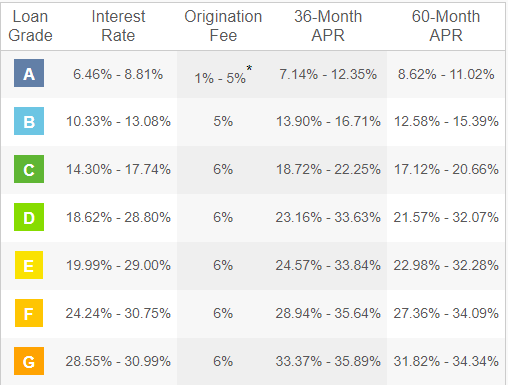

In [36]:
Image(filename = "table_with_grades.png")

The differences in interest rate per grade is also present in our data set, as we can conclude with the boxen plot below:


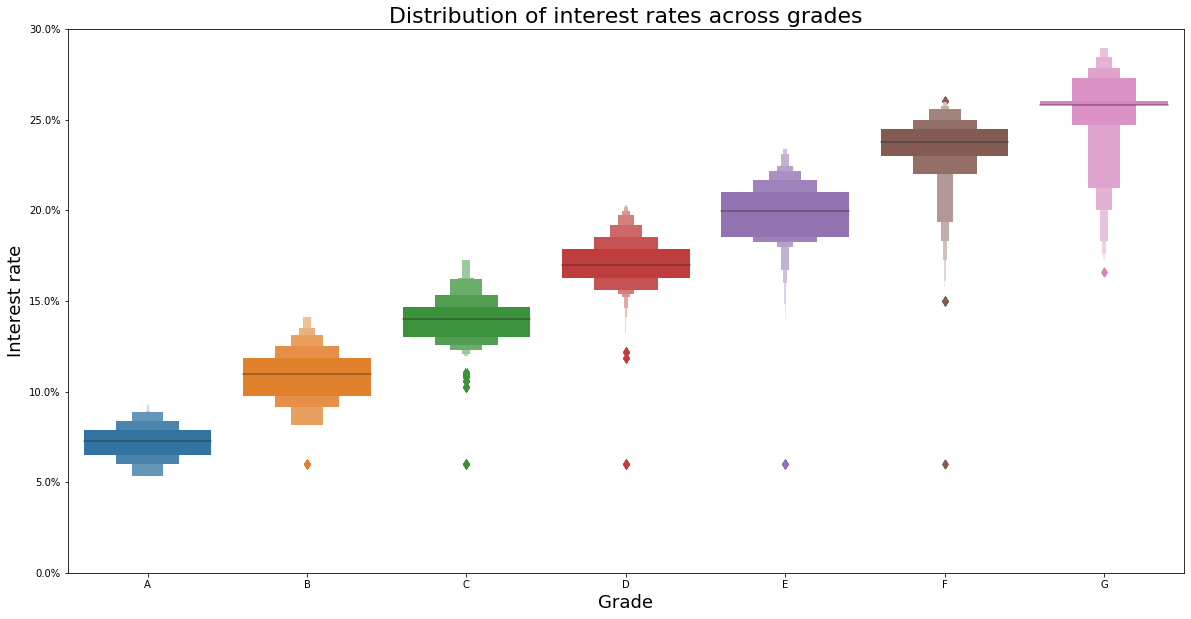

In [37]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title('Distribution of interest rates across grades', size = 22)

sns.catplot(x="grade", y="int_rate", kind='boxen', data=df,order=['A','B','C','D','E','F','G'], ax=ax1)
ax1.set_ylim(0, 30)
ax1.set_xlabel('Grade', size = 18)
ax1.set_ylabel('Interest rate', size = 18)
formatter = FuncFormatter(percentage)
ax1.yaxis.set_major_formatter(formatter)
plt.close('all')
fig

Correctly assessing the risk of each loan is crucial for LC. For investors, interest rates that do not compensate them for the risk of the loan (based on the information they have available) will deter them from funding these loans.


Incorrect risk estimation will also create an adverse selection problem on the borrowers side. Borrowers who where assigned an APR that is higher than what they consider to be appropriate for the level of risk their loan poses will decide not to borrow from lending club, while borrowers who got a rate lower than the rate their risk should yield will be eager to to take the loan. Both these effects combined would lower the overall quality of the loans (higher risk) for each interest rate. This decrease in quality will reduce future returns for investors as well as Lending Club’s credibility as an information provider, which, in turn, will reduce LC’s ability to convince investors to fund future loans.


In this project, our group will first try to understand if the intereste rate and grade of loans reflect the riskiness of loans (default and/or charge off rates). Afterwards, we will analyse the impact of carefully selected variables on the risk of loans defaulting / being charged off (which we will often refer to as just default when talking about both variables) and see if the effects observed have the expected impact on the LC’s assessment of the loan (grade and/or interest rate).

These variables were chosen after consulting Lending club’s website and the process they use give borrowers interest rates. They are either variables Lending Club directly asks borrowers in the process or variables that are known to have a high impact on the credit score of an individual (used to determine interest rates) and that are present in each person’s credit history (which Lending Club has access to). As there are many variables, we chose to pick some variables we know Lending Club uses in this process and other variables we suspect they don’t. 

We will analyze the differences in past default rates for the different parameters within each variable and see if the same differences are observed in the grade and/or int_rate variables. For example, if it is observed that borrowers with higher income have a lower percentage of default, then it should be the case that they also have, on average, lower interest rates. This will allow us to observe if the variable as a significant correlation with the riskiness of the loan, and if that correlation is being correctly assessed in the evaluation of the loan and if it should be taken into account by LC if it is not.

## Data Cleaning
In order to analyse the received dataset from Lending Club it first has to be curated.
First, we have to understand which variables we are going to use, based on the amount of nan values they have.

In [5]:
#getting the percentage of null values per variable
nas = db.isna().sum().any()
if nas ==True:
    total_na = db.isnull().sum()
    total_na = pd.DataFrame(total_na, columns= ['total_na'])
    percent_na = round(db.isnull().sum()/db.isnull().count()*100,5)
    total_na['% of NA'] = percent_na
    dtypes = []
    for i in db.columns:
        dtype = str(db[i].dtype)
        dtypes.append(dtype)
    total_na['Type'] = dtypes
    total_na = total_na.sort_values('% of NA', ascending=False)
total_na

,total_na,% of NA,Type
dti_joint,886870,99.94264,float64
annual_inc_joint,886868,99.94241,float64
verification_status_joint,886868,99.94241,object
il_util,868762,97.90202,float64
mths_since_rcnt_il,866569,97.65489,float64
...,...,...,...
total_pymnt,0,0.00000,float64
total_pymnt_inv,0,0.00000,float64
total_rec_prncp,0,0.00000,float64
total_rec_int,0,0.00000,float64


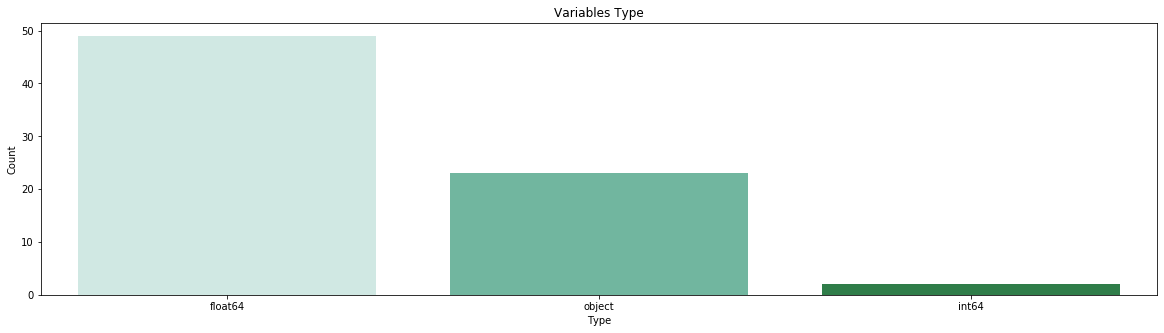

In [6]:
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sns.barplot(data=db,x=total_na.Type.unique(), y=total_na.Type.value_counts(),ax=ax, palette='BuGn')
ax.set(xlabel='Type', ylabel='Count',title="Variables Type");

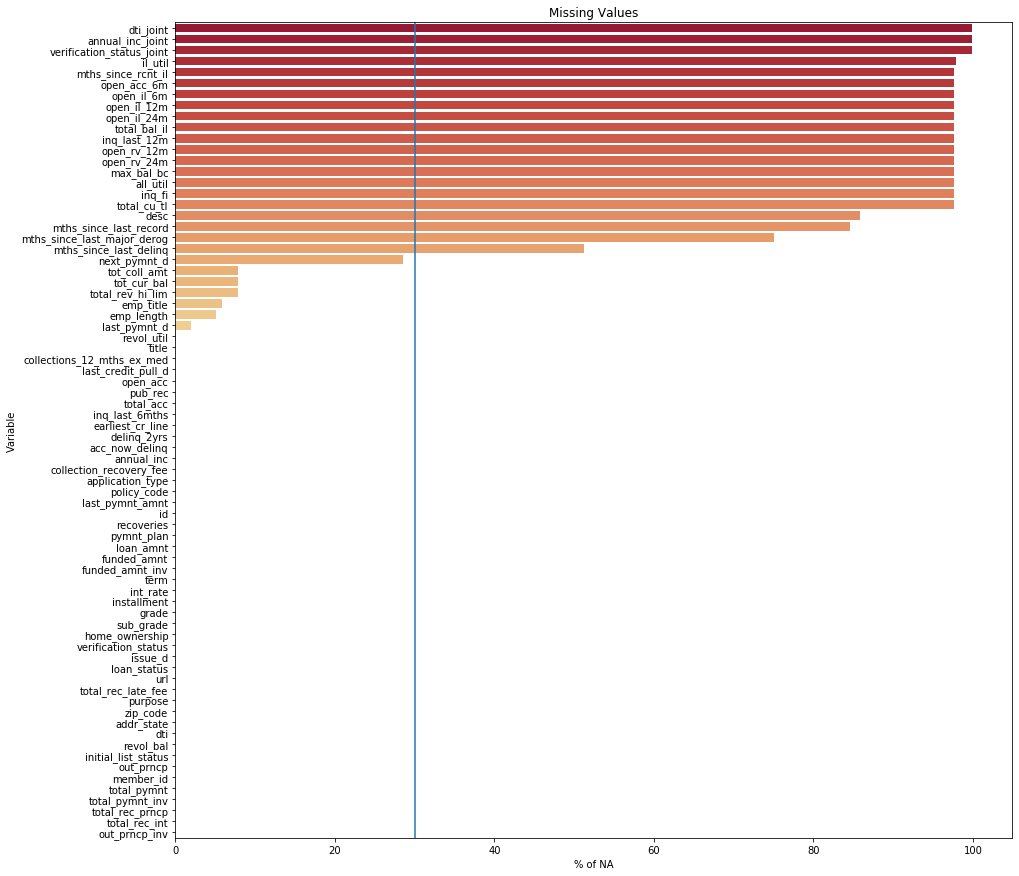

In [7]:
#visualization of number of nulls per value with the cut off line
fig,ax = plt.subplots()
fig.set_size_inches(15,15)
sns.barplot(data=total_na,x=total_na['% of NA'], y=total_na.index,ax=ax, palette='RdYlBu')
#sns.palplot(sns.light_palette("YlGnBu", reverse=True)
plt.axvline(30, 0,15)
ax.set(xlabel='% of NA', ylabel='Variable',title="Missing Values");

As shown in the previous chart, we will define a threshold for which we will consider the variables we want to analyse, since many of them are too incomplete for us to be able to take any sort of useful information from it. Taking into account the percentages shown above, we think 30% will be a nice threshold to consider.

In [8]:
#keeping only variables with number of nulls bellow 30%
columns_considered = total_na[total_na['% of NA']<30].index
db_1 = db[columns_considered].copy()

In [9]:
db_1.head(10)

,next_pymnt_d,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,emp_title,emp_length,last_pymnt_d,revol_util,title,collections_12_mths_ex_med,...,dti,revol_bal,initial_list_status,out_prncp,member_id,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,out_prncp_inv
0,NaN,NaN,NaN,NaN,NaN,10+ years,Jan-2015,83.7,Computer,0.0,...,27.65,13648.0,f,0.00,1296599,5861.071414,5831.78,5000.00,861.07,0.00
1,NaN,NaN,NaN,NaN,Ryder,< 1 year,Apr-2013,9.4,bike,0.0,...,1.00,1687.0,f,0.00,1314167,1008.710000,1008.71,456.46,435.17,0.00
2,NaN,NaN,NaN,NaN,NaN,10+ years,Jun-2014,98.5,real estate business,0.0,...,8.72,2956.0,f,0.00,1313524,3003.653644,3003.65,2400.00,603.65,0.00
3,NaN,NaN,NaN,NaN,AIR RESOURCES BOARD,10+ years,Jan-2015,21.0,personel,0.0,...,20.00,5598.0,f,0.00,1277178,12226.302212,12226.30,10000.00,2209.33,0.00
4,Feb-2016,NaN,NaN,NaN,University Medical Group,1 year,Jan-2016,53.9,Personal,0.0,...,17.94,27783.0,f,766.90,1311748,3242.170000,3242.17,2233.10,1009.07,766.90
5,NaN,NaN,NaN,NaN,Veolia Transportaton,3 years,Jan-2015,28.3,My wedding loan I promise to pay back,0.0,...,11.20,7963.0,f,0.00,1311441,5631.377753,5631.38,5000.00,631.38,0.00
6,Feb-2016,NaN,NaN,NaN,Southern Star Photography,8 years,Jan-2016,85.6,Loan,0.0,...,23.51,17726.0,f,1889.15,1304742,8136.840000,8136.84,5110.85,3025.99,1889.15
7,NaN,NaN,NaN,NaN,MKC Accounting,9 years,Jan-2015,87.5,Car Downpayment,0.0,...,5.35,8221.0,f,0.00,1288686,3938.144334,3938.14,3000.00,938.14,0.00
8,NaN,NaN,NaN,NaN,NaN,4 years,Apr-2012,32.6,Expand Business & Buy Debt Portfolio,0.0,...,5.55,5210.0,f,0.00,1306957,646.020000,646.02,162.02,294.94,0.00
9,NaN,NaN,NaN,NaN,Starbucks,< 1 year,Nov-2012,36.5,Building my credit history.,0.0,...,18.08,9279.0,f,0.00,1306721,1476.190000,1469.34,673.48,533.42,0.00


**Data Variables : next_pymnt_d, last_pymnt_d** <br>
For these variables, since they are both date variables, we should treat them differently from others. The interesting thing about them is that next_pymnt_d is always equal to last_pymnt_d plus one month. So we can fill them from that relationship.


In [10]:
#droping observations when both columns are null
db_2 = db_1.dropna(subset=['next_pymnt_d', 'last_pymnt_d'], how='all')

In [11]:
db_2[['next_pymnt_d','last_pymnt_d']].head(10)

,next_pymnt_d,last_pymnt_d
0,NaN,Jan-2015
1,NaN,Apr-2013
2,NaN,Jun-2014
3,NaN,Jan-2015
4,Feb-2016,Jan-2016
5,NaN,Jan-2015
6,Feb-2016,Jan-2016
7,NaN,Jan-2015
8,NaN,Apr-2012
9,NaN,Nov-2012


In [12]:
#amount of data still left relative to the original
len(db_2)/len(db_1)

0.9994061162141543

First, we can create a dataframe in which both these variables have a proper date structure and the nan values are set to 0

In [13]:
warnings.filterwarnings('ignore')
db_2['next_pymnt_d'] = db_2['next_pymnt_d'].fillna(0)
db_2['last_pymnt_d'] = db_2['last_pymnt_d'].fillna(0)


next_pymnt = [x for x in db_2['next_pymnt_d']]
last_pymnt = [x for x in db_2['last_pymnt_d']]

last_pymnt_d=[]
for x in last_pymnt:
    if x == 0:        
        last_pymnt_d.append(x)
    else:
        x= str(x)
        datetime_object = datetime.datetime.strptime(x, '%b-%Y').date()
        last_pymnt_d.append(datetime_object)

next_pymnt_d =[]
for x in next_pymnt:
    if x == 0:        
        next_pymnt_d.append(x)
    else:
        x= str(x)
        datetime_object = datetime.datetime.strptime(x, '%b-%Y').date()
        next_pymnt_d.append(datetime_object)

dates = pd.DataFrame({'next_pymnt_d':next_pymnt_d,
                     'last_pymnt_d':last_pymnt_d})
dates.head(10)

,next_pymnt_d,last_pymnt_d
0,0,2015-01-01
1,0,2013-04-01
2,0,2014-06-01
3,0,2015-01-01
4,2016-02-01,2016-01-01
5,0,2015-01-01
6,2016-02-01,2016-01-01
7,0,2015-01-01
8,0,2012-04-01
9,0,2012-11-01


Then, we make the calculation necessary for next_pymnt_d to have one extra month than last_pymnt_d and viceversa

In [14]:
next_pymnt_d =[]
last_pymnt_d=[]

for a, b in dates.itertuples(index=False):
    if a==0:
        month = b.month 
        year = b.year + month // 12
        month = month % 12 + 1
        day = min(b.day, calendar.monthrange(year,month)[1])
        n_date= datetime.date(year, month, day)
        next_pymnt_d.append(n_date) 
    else:
        next_pymnt_d.append(a)
        
    if b==0:
        _first_day = a.replace(day=1)
        prev_month_lastday = _first_day - datetime.timedelta(days=1)
        n_date= prev_month_lastday.replace(day=1)
        last_pymnt_d.append(n_date)
    else:
        last_pymnt_d.append(b) 
        
dates = pd.DataFrame({'next_pymnt_d':next_pymnt_d,
                     'last_pymnt_d':last_pymnt_d})

dates.head(10)

,next_pymnt_d,last_pymnt_d
0,2015-02-01,2015-01-01
1,2013-05-01,2013-04-01
2,2014-07-01,2014-06-01
3,2015-02-01,2015-01-01
4,2016-02-01,2016-01-01
5,2015-02-01,2015-01-01
6,2016-02-01,2016-01-01
7,2015-02-01,2015-01-01
8,2012-05-01,2012-04-01
9,2012-12-01,2012-11-01


Finally, we change the format back to 'MMM-yyyy', in order for it to be consistent with the rets of the variables.

In [15]:
next_pymnt_d =[]
last_pymnt_d=[]

for a, b in dates.itertuples(index=False):
    a = a.strftime("%b-%Y")
    next_pymnt_d.append(a)
    
    b = b.strftime("%b-%Y")
    last_pymnt_d.append(b)

dates = pd.DataFrame({'next_pymnt_d':next_pymnt_d,
                     'last_pymnt_d':last_pymnt_d})

db_2['last_pymnt_d'] = dates['last_pymnt_d'].values
db_2['next_pymnt_d'] = dates['next_pymnt_d'].values

db_2[['next_pymnt_d','last_pymnt_d']].head(10)

,next_pymnt_d,last_pymnt_d
0,Feb-2015,Jan-2015
1,May-2013,Apr-2013
2,Jul-2014,Jun-2014
3,Feb-2015,Jan-2015
4,Feb-2016,Jan-2016
5,Feb-2015,Jan-2015
6,Feb-2016,Jan-2016
7,Feb-2015,Jan-2015
8,May-2012,Apr-2012
9,Dec-2012,Nov-2012


For the following variables, we are filling the nan values with the mode considering there were no other variables with which we could fill it with and this particular one has very fixed values for which other statistical references (mean, median) wouldn't make sense. Unlike the previous date variables which could be computed from each other, with last_credit_pull_d, no such thing is possible.

In [16]:
db_2['tot_coll_amt'].value_counts()

0.0        700571
50.0         1754
100.0        1357
75.0         1044
200.0         714
            ...  
13165.0         1
6319.0          1
13169.0         1
20304.0         1
8190.0          1
Name: tot_coll_amt, Length: 10322, dtype: int64

In [17]:
db_2['last_credit_pull_d'].value_counts()

Jan-2016    730406
Dec-2015     19272
Nov-2015     11488
Oct-2015     10417
Sep-2015     10075
             ...  
Oct-2007         3
Jul-2007         1
May-2008         1
Jul-2008         1
Jun-2008         1
Name: last_credit_pull_d, Length: 103, dtype: int64

In [18]:
warnings.filterwarnings('ignore')
db_2['tot_coll_amt']= db_2['tot_coll_amt'].fillna(db_2['tot_coll_amt'].mode()[0])
db_2['last_credit_pull_d']= db_2['last_credit_pull_d'].fillna(db_2['last_credit_pull_d'].mode()[0])

Considering borrowers can give each loan a random title like 'trying to pay of my bill!!!', we just fill the nan values with 'Untitled'

In [19]:
warnings.filterwarnings('ignore')
db_2['title'] = db_2['title'].fillna('Untitled')

Considering the other variables that were related to the current balance, were eliminated when we were dropping variables lower than our threshold, we decided to use the mean as a way to fill the nan values.

In [20]:
warnings.filterwarnings('ignore')
db_2['tot_cur_bal']= db_2['tot_cur_bal'].fillna(db_2['tot_cur_bal'].mean())

Since emp_title is defined by the borrower, we cannot specify the variable for the nan values

In [21]:
db_2 = db_2.fillna({'emp_title':'Not Specified'})

We're changing the variable years_list from str values to float values (where 0 is 1 or lower; 10 is 10 or higher). 

In [22]:
db_3 = db_2
years_list = db_3.emp_length.unique()
years_list = list(years_list)
del years_list[-1]
years_list

['10+ years',
 '< 1 year',
 '1 year',
 '3 years',
 '8 years',
 '9 years',
 '4 years',
 '5 years',
 '6 years',
 '2 years',
 '7 years']

In [23]:
years_list_new = [10, 0, 1, 3, 8, 9, 4, 5, 6, 2, 7]
db_4 = db_3.replace(years_list, years_list_new)
db_4.groupby(['grade'])[['emp_length']].median() #to see if the we should adjust employment length based on the grade of the loan

,emp_length
grade,
A,6.0
B,6.0
C,6.0
D,6.0
E,6.0
F,7.0
G,6.0


Since most there is no significant difference in median employment lenght between the different grade, we will substitute null values in this variable with its mean

In [25]:
db_2[['emp_length']] = db_4[['emp_length']]
x = float(db_2[['emp_length']].median())
db_2 = db_2.fillna({'emp_length':x})

In [26]:
db_2.groupby(['collections_12_mths_ex_med'])[['id']].count()

,id
collections_12_mths_ex_med,
0.0,875031
1.0,10820
2.0,731
3.0,88
4.0,23
5.0,7
6.0,2
7.0,1
10.0,1


Since the vast majority of the values in this variable are 0, we will substitue the null values with the median (which is also 0)

In [27]:
db_2 = db_2.fillna({'collections_12_mths_ex_med':db_2['collections_12_mths_ex_med'].median()})

The variable revol_util is the ratio between the variables revol_bal and total_rev_hi_lim, in percentage, rounded to the 1st decimal case

In [28]:
db_3 = db_2[['id', 'revol_bal', 'revol_util', 'total_rev_hi_lim']]
db_3['ratio'] = (db_3['revol_bal']*100)/db_3['total_rev_hi_lim']
db_3

,id,revol_bal,revol_util,total_rev_hi_lim,ratio
0,1077501,13648.0,83.7,NaN,NaN
1,1077430,1687.0,9.4,NaN,NaN
2,1077175,2956.0,98.5,NaN,NaN
3,1076863,5598.0,21.0,NaN,NaN
4,1075358,27783.0,53.9,NaN,NaN
...,...,...,...,...,...
887374,36371250,14037.0,82.1,17100.0,82.087719
887375,36441262,8621.0,84.5,10200.0,84.519608
887376,36271333,11031.0,61.3,18000.0,61.283333
887377,36490806,8254.0,30.6,27000.0,30.570370


In [29]:
db_2['revol_util'] = db_2.apply(lambda row: row['total_rev_hi_lim'] 
                                if row['total_rev_hi_lim'] == 0 
                                else row['revol_util'], 
                                axis=1) #if total_rev_hi_lim is 0 then revol_util, which is a fraction of the former, must be also 0
    
    
db_2['revol_util'] = db_2.apply(lambda row: (row['revol_bal']*100)/row['total_rev_hi_lim'] 
                                if np.isnan(row['revol_util']) 
                                else row['revol_util'], 
                                axis=1) 

db_2 = db_2.fillna({'revol_util':db_2['revol_util'].median()}) #when total_rev_hi_lim is null, revol_util will also be null. for these remaning values we use the median

In [30]:
db_2['total_rev_hi_lim'] = db_2.apply(lambda row: db_2['total_rev_hi_lim'].median() 
                                      if np.isnan(row['total_rev_hi_lim']) 
                                      and row['revol_util'] == 0 
                                      else row['total_rev_hi_lim'], 
                                      axis=1) #if revol_util is 0, the ratio would be 0 irregardless of the value of total_rev_hi_lim, so in these cases we use the median to fillna

db_2['total_rev_hi_lim'] = db_2.apply(lambda row: (row['revol_bal']*100)/row['revol_util'] 
                                      if np.isnan(row['total_rev_hi_lim']) 
                                      else row['total_rev_hi_lim'], 
                                      axis=1)

Drop rows where all 6 columns that have to do with Credit Line are NULL. This seems appropiate as only 29 rows are affected

In [31]:
print('The number of rows that share nan values from these columns are',db_2[['earliest_cr_line','delinq_2yrs','acc_now_delinq','open_acc','pub_rec','total_acc','inq_last_6mths']].isna().sum()[0])

The number of rows that share nan values from these columns are 29


In [32]:
db_2.dropna(subset=['earliest_cr_line','delinq_2yrs','acc_now_delinq','open_acc','pub_rec','total_acc','inq_last_6mths'], inplace = True, how = 'all')

In [33]:
db_2.isna().sum()

next_pymnt_d                  0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
emp_title                     0
emp_length                    0
last_pymnt_d                  0
revol_util                    0
title                         0
collections_12_mths_ex_med    0
last_credit_pull_d            0
open_acc                      0
pub_rec                       0
total_acc                     0
inq_last_6mths                0
earliest_cr_line              0
delinq_2yrs                   0
acc_now_delinq                0
annual_inc                    0
collection_recovery_fee       0
application_type              0
policy_code                   0
last_pymnt_amnt               0
id                            0
recoveries                    0
pymnt_plan                    0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installm

We are going to call our curated Dataset df.

In [34]:
df = db_2
db = df

# Initial Analysis

The first variable we need to understand for this analysis is the interest rate. Lending club claims that they offer lower interest rate than those offered by commercial banks, since they can bypass several processing and advertising costs. To test this hypothesis, we would like to know how the average interest rate offered by LC compares to those offered by the Federal Reserve (which, even though is inaccessible to regular borrowers, it is good for reference) and the rates offered by commercial banks (we use the “Finance Rate on Consumer Installment Loans at Commercial Banks, New Autos 60 Month Loan” as a proxy for this). For this last variable, we are missing the values for some months. Despite this, it is still possible to see the overall trend, so our findings are not significantly diminished because of it.

(https://fred.stlouisfed.org/series/RIFLPBCIANM60NM)

In [321]:
s = db_2.groupby('last_pymnt_d')['int_rate'].mean().reset_index()
s['last_pymnt_d']= pd.to_datetime(s['last_pymnt_d'])
s = s.sort_values(by='last_pymnt_d')
dates = s['last_pymnt_d']
int_rate = s['int_rate']

source = ColumnDataSource(data=dict(dates= dates, int_rate=int_rate))

p = figure(plot_width = 600, plot_height = 600, 
           title = 'Interest Rate Variation on Loans over the years',
           x_axis_type="datetime", y_range=(0, 20))
cr = p.circle(dates, int_rate,size=20,
              fill_color="grey", hover_fill_color="firebrick",
              fill_alpha=0.01, hover_alpha=0.7,
              line_color=None, hover_line_color="white")

cr_1 = p.circle(loan_rate['Date'],loan_rate['Interest Rate'],size=20,
              fill_color="grey", hover_fill_color="firebrick",
              fill_alpha=0.05, hover_alpha=0.7,
              line_color=None, hover_line_color="white")

cr_2 = p.circle(tb_rate['Date'],tb_rate['Interest Rate'],size=20,
              fill_color="grey", hover_fill_color="firebrick",
              fill_alpha=0.01, hover_alpha=0.7,
              line_color=None, hover_line_color="white")

p.xaxis[0].formatter.days= '%m/%d/%Y'
p.xgrid.grid_line_color=None
p.ygrid.grid_line_alpha=0.5
p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'Interest Rate'

a=p.line(dates, int_rate, line_width=2, color='black')
b=p.line(loan_rate['Date'],loan_rate['Interest Rate'], line_width=2, color='darkblue')
c=p.line(tb_rate['Date'],tb_rate['Interest Rate'], line_width=2, color='lightgreen')

p.add_tools(HoverTool(tooltips=[('Date','@x{%F}'), ('Interest Rate','@y')], formatters ={'x':'datetime', 'y': 'printf'} , renderers=[cr], ))
p.add_tools(HoverTool(tooltips=[('Date','@x{%F}'), ('Interest Rate','@y')], formatters ={'x':'datetime', 'y': 'printf'} , renderers=[cr_1],))
p.add_tools(HoverTool(tooltips=[('Date','@x{%F}'), ('Interest Rate','@y')], formatters ={'x':'datetime', 'y': 'printf'} , renderers=[cr_2], ))

legend = Legend(items=[
    LegendItem(label="Lending Club Interest Rates", renderers=[a]),
    LegendItem(label="Commercial Bank Interest Rates", renderers=[b]),
    LegendItem(label="Treasury Bill Interest Rates", renderers=[c]),
])
p.add_layout(legend)

output_notebook()
show(p)

Loading BokehJS ...

From the graph above, we can see that **Lending Club’s rates are actually much higher than those by commercial banks, which also stand above those offered by the Federal Reserve.** This might be due to an adverse selection problem, as borrowers who are turned down from a credit application at a commercial banks might resort to Lending Club instead. It might also be that Lending Club has lower “hidden fees” as they claim on their website, which would lead to lower overall borrowing costs. Alternatively, it could also be that Lending Club also finances more risky projects/loans than commercial banks, and thus also asks for a higher interest rate, as investors are generally risk averse and must be rewarded when taking higher risk.

Next, we are interested in knowing how the default rates are related to the grades and to the interest rates

In [36]:
y = df.pivot_table(index=['grade', 'loan_status'], aggfunc='size')
y = pd.DataFrame(y)
Grade_Status = y.groupby(level=0).transform(lambda x: x/x.sum())
Grade_Status = pd.DataFrame(Grade_Status).reset_index()
G = Grade_Status.rename(columns={0:'Proportion'})
G['Proportion'] = pd.Series(["{0:.2f}%".format(val * 100) for val in G['Proportion']], index = G.index)
Default = G[G['loan_status']=='Default']
Default.reset_index().rename(columns={'proportion':'grade'},inplace=True)

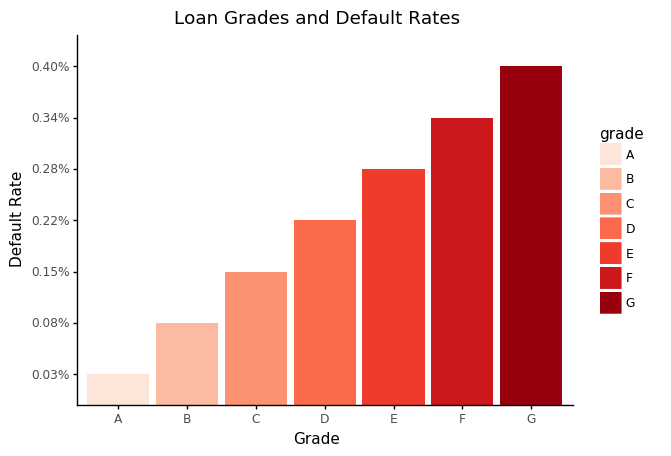

<ggplot: (167649332975)>

In [37]:
ggplot(Default, aes('grade','Proportion', fill = 'grade')) +\
geom_bar(stat='identity') +\
labs (x='Grade', y = 'Default Rate', title = 'Loan Grades and Default Rates')+\
theme_classic() + scale_fill_brewer(palette='Reds')

In [38]:
Default1 = G[G['loan_status']=='Charged Off']
Default1.reset_index().rename(columns={'proportion':'grade'},inplace=True)
Default1['number'] = [float(x[:-1]) for x in Default1['Proportion']]

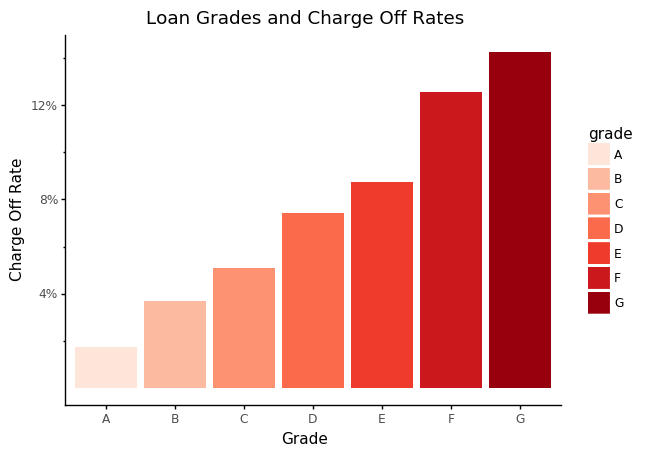

<ggplot: (-9223371869204383961)>

In [39]:
ggplot(Default1, aes('grade','number', fill = 'grade')) +\
geom_bar(stat='identity') +\
labs (x='Grade', y = 'Charge Off Rate', title = 'Loan Grades and Charge Off Rates')+\
theme_classic() + scale_fill_brewer(palette='Reds')+\
scale_y_continuous(breaks = [4, 8, 12], labels=['4%', '8%', '12%'])

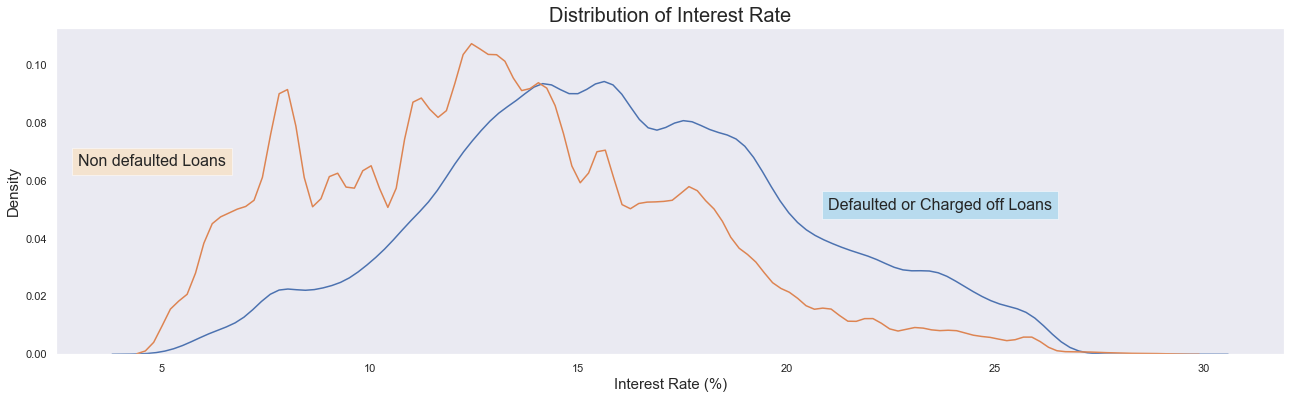

In [207]:
target_list = [1 if i=='Default' or i=='Charged Off' else 0 for i in df['loan_status']]

df['TARGET'] = target_list
df['TARGET'].value_counts()

fig = plt.figure(figsize=(22,6))
sns.kdeplot(df.loc[df['TARGET'] == 1, 'int_rate'], legend=False)
sns.kdeplot(df.loc[df['TARGET'] == 0, 'int_rate'], legend = False);
plt.text(3, 0.065, 'Non defaulted Loans',
        bbox={'facecolor':'navajowhite', 'alpha':0.5, 'pad':6}, fontsize = 16)
plt.text(21, 0.05, 'Defaulted or Charged off Loans',
        bbox={'facecolor':'skyblue', 'alpha':0.5, 'pad':6}, fontsize = 16)

plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of Interest Rate',fontsize=20);

From the bar plot above, we can conclude that our initial hypothesis was correct and that **as grade of the loan improves, the riskiness decreases,** and so the credit assessment process of Lending Club is working as intended. However, just because we verify this relation, does not mean that the system is efficient and that each variable is taken correctly taken into account when evaluating a loan.


As for the distribution plot, we observe a consistent higher density for  defaulted and charged off loans when the interest rate of the loan is greater than 14%, which is also when the density of the non-defaulted loans starts to decrease. Since the interest rates of the defaulted or charged off loans are higher than the rates of the non-defaulted ones, we can conclude that Lending Club is being successfull in chargin higher rates to riskier loans.

#  Annual Income

We started with our evaluation by taking a closer look at the annual income data. This variable is asked by lending club when applying for a loan, but according to their website it’s actually the Debt to Income ratio that they use when computing the interest rate. For a better overview the income data was split into 4 quantiles. Our initial assumption was that there is a higher probability to default or getting charged off for those lenders with a lower income for various reasons. For example, the low income group might be less experienced and skilled to overview and handle their finances. 

In [142]:
bins = [df['annual_inc'].quantile(0),df['annual_inc'].quantile(0.25), df['annual_inc'].quantile(0.5), df['annual_inc'].quantile(0.75), df['annual_inc'].quantile(1)]
bins = [ int(x) for x in bins ]
labels = ['{} - {}'.format(i + 1, j) for i, j in zip(bins[:-1], bins[1:])] 
print('The Annual Income Quartiles are: \n',labels)

The Annual Income quartiles are: 
 ['1 - 45000', '45001 - 65000', '65001 - 90000', '90001 - 9500000']


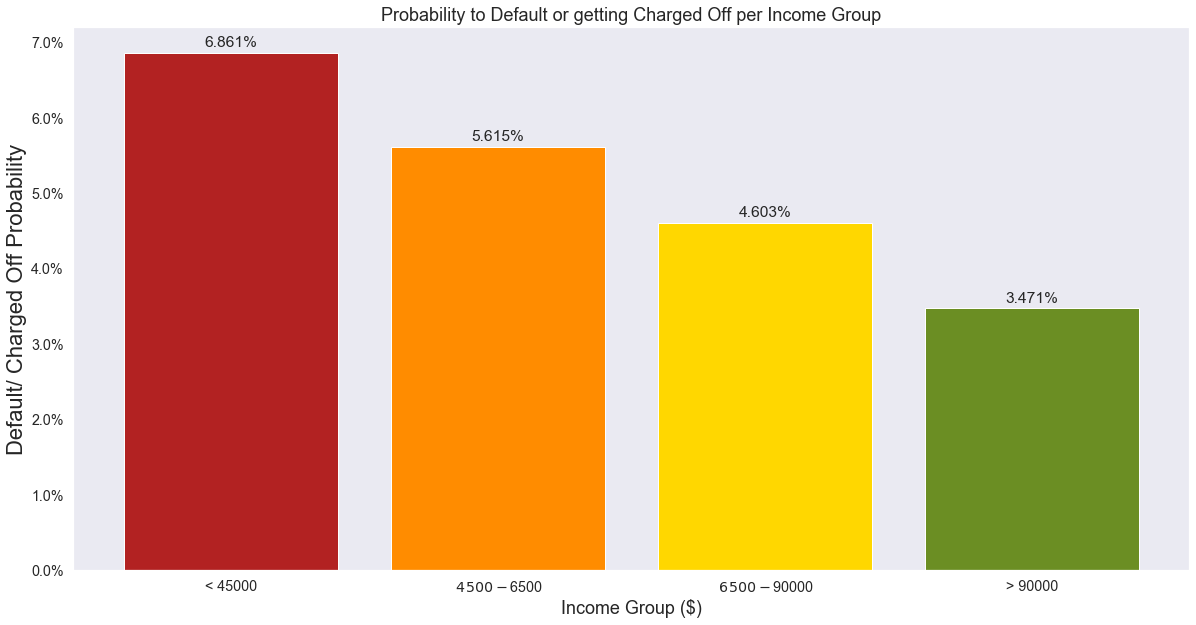

In [319]:
bins = [df['annual_inc'].quantile(0),df['annual_inc'].quantile(0.25), df['annual_inc'].quantile(0.5), df['annual_inc'].quantile(0.75), df['annual_inc'].quantile(1)]
bins = [ int(x) for x in bins ]
labels = ['{} - {}'.format(i + 1, j) for i, j in zip(bins[:-1], bins[1:])] 
df['IncomeGroup'] = pd.cut(df['annual_inc'], 
                            bins=bins,
                            labels= labels,
                            right=True, 
                            include_lowest=True)
df['def/co']= np.where(df['loan_status']=='Default', True, np.where(df['loan_status']=='Charged Off', True, False))
q = df.groupby('IncomeGroup')['def/co'].mean().reset_index()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3%}'.format(round(height,5)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

sns.set(font_scale=1.3)

fig, ax = plt.subplots(figsize=(20, 10))
graph =ax.bar(q["IncomeGroup"], q['def/co'], color=['firebrick', 'darkorange', 'gold', 'olivedrab'])
ax.set_xlabel('Income Group ($)', size = 18)
ax.set_ylabel('Default/ Charged Off Probability', size = 22)
plt.title('Probability to Default or getting Charged Off per Income Group', size=18)
formatter = FuncFormatter(percentage1)
ax.yaxis.set_major_formatter(formatter)
ax.set_xticklabels(['< 45000',' $4500-$6500 ',' $6500-$90000 ','> 90000'])
ax.grid(False)
autolabel(graph)

plt.show()

 By taking a look at the bar plot we can confirm our first assumption. **The probability to default getting charged decreases for higher incomes.** Nevertheless, we would have expected that the decrease would be more obvious. Comparing the high income group with the low income group, we can see that belonging to the low income group leads to a default/getting charged off probability still not even twice as big compared to the high income group, which still have a probability around 3.5%.

As we have previously seen, high income borrowers have a significantly lower probability to default or getting charged off. This would lead to the assumption that income affects grading in a way that low income people get worse grades than high income people. In order to validate this assumption, let's visualize the income distributions per grade.

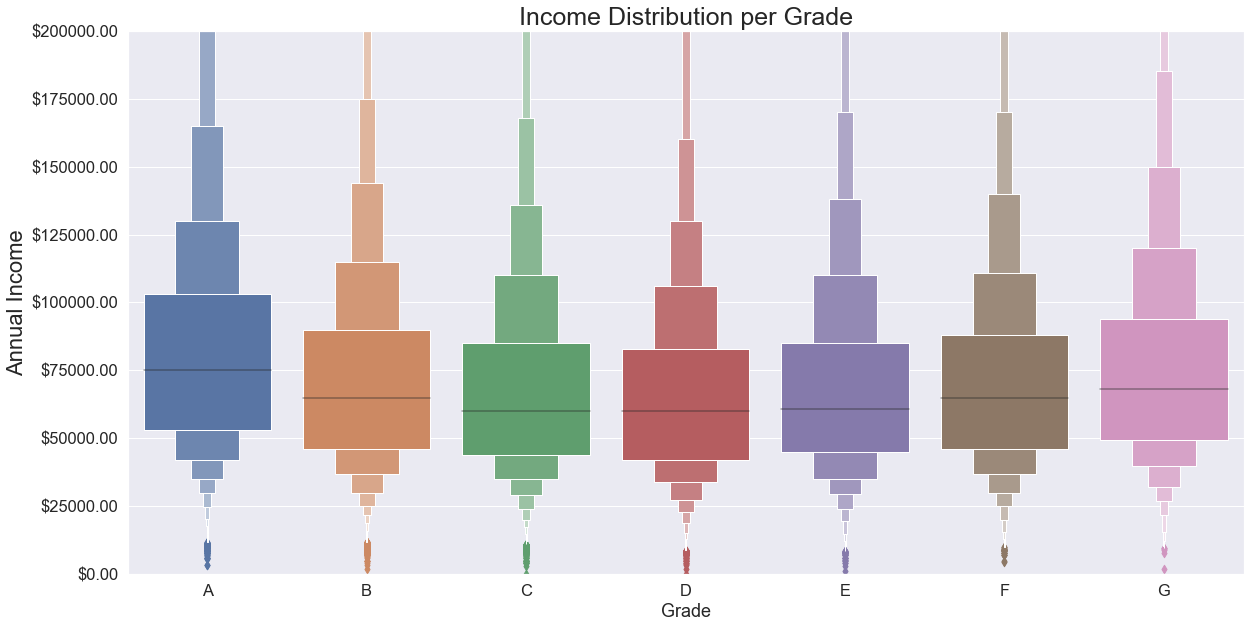

In [128]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.set(font_scale=1.5)
sns.boxenplot(x="grade", y="annual_inc", data=df, order = ['A','B','C','D','E','F','G'])

ax.set_ylim(0, 200000)
plt.title('Income Distribution per Grade', size = 25)
ax.set_xlabel('Grade', size = 18)
ax.set_ylabel('Annual Income', size = 22)
formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)
plt.show()

Furthermore, we should understand the debt/income ratio per grade, since this is the variable the LendingClub uses to compute the interest rate for each loan.

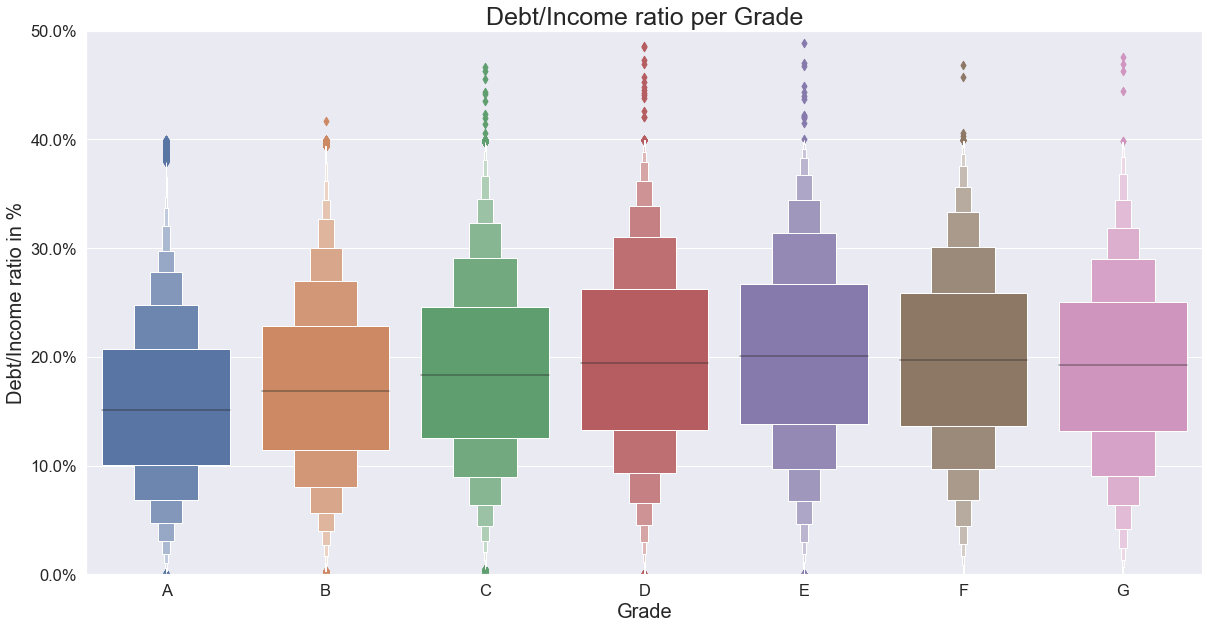

In [76]:
fig = plt.figure(figsize=(20, 10))

sns.set(font_scale=1.5)
ax = sns.boxenplot(x="grade", y="dti", data=df, order = ['A','B','C','D','E','F','G'])
#sns.set(font_scale=5)
plt.ylim(0, 50)
ax.set_title('Debt/ Income ratio per Grade', fontsize=25)
ax.set_xlabel('Grade', fontsize=20)
ax.set_ylabel('Debt/Income ratio in %', fontsize=20)
formatter = FuncFormatter(percentage)
ax.yaxis.set_major_formatter(formatter)

plt.show()

**Annual Income Conclusions:**

On the one hand we can see that A graders generally have a higher income than other grades. Comparing all the other graphs though, there are no significant differences visible. In fact, F graders seem to have a higher income than C- and D graders. **We carefully conclude that annual income has no or only insufficient influence on the grading and therefore the interest rates.**

Instead of the annual income itself, Lending Club could be using the Debt/Income ratio as an input variable for their grading system. Even though it stated as a ratio in the explaining text, we believe it’s meant to be a percentage. Otherwise values above 1 would not make sense. In the following graph we can see that the **debt/income ratio increases with worse grades,** which would be expected. One interesting  detail here is repetitive. The ratio for G graders is lower than the one for F and E. There was a similar finding for the annual income. This leads to the conclusion that there must be another driving factor to get the worst possible grade than just the income or the debt/income ratio.

# Employment Length

Another variable we tested was Employment length. We expect borrowers with lower employment length to have higher default and charge off rates, since they should have lower income, total wealth and, most importantly, a lower job security. In addition, we want to know if the interest rates assigned by lending club reflect the differences (if any) in default rates for borrowers with different employment lengths.

In [117]:
df_t = df[['loan_status', 'emp_length']]
df_d = df_t.loc[(df['loan_status'] == 'Default')]
df_c = df_t.loc[(df['loan_status'] == 'Charged Off')]
df_t = df_t.groupby(['emp_length']).count()
df_d = df_d.groupby(['emp_length']).count()
df_c = df_c.groupby(['emp_length']).count()
df_t['emp_length'] = df_t.index
df_t.index = range(0, 11)
df_t = df_t.rename(columns={"loan_status": "total"})
df_t['defaults'] = df_d['loan_status']
df_t['charge_offs'] = df_c['loan_status']
df_t['%defaults'] = df_t['defaults']*100/df_t['total']
df_t['%charge_offs'] = df_t['charge_offs']*100/df_t['total']
df_t2 = pd.melt(df_t, id_vars=['emp_length'], value_vars=['%defaults', '%charge_offs'])
a = ['% of defaults', '% of charge offs']
b = [str(x) for x in df_t['emp_length']]
b[0], b[10] = '<1', "10+"
d_average = df_t['defaults'].sum() * 100 / df_t['total'].sum()
co_average = df_t['charge_offs'].sum() *100 / df_t['total'].sum()

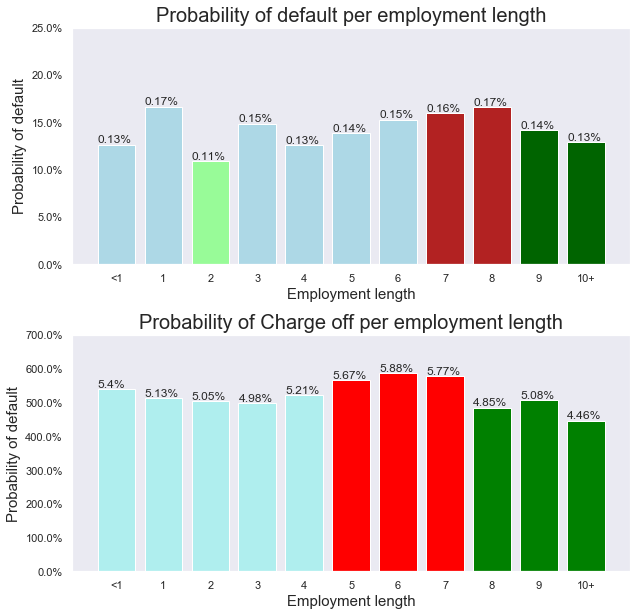

In [209]:
emp_length = df_t['emp_length']
charge_offs = df_t['%charge_offs']
defaults = df_t['%defaults']
sns.set()
fig, ax = plt.subplots(2,1,figsize=(10, 10))

ax[0].bar(emp_length, defaults, color = 'lightblue')
ax[0].bar([7,8], [0.159321,0.166166], color = 'firebrick')
ax[0].bar([9,10], [0.141463,0.128671], color = 'darkgreen')
ax[0].bar(2, 0.109112, color= 'palegreen' )
ax[1].bar(emp_length, charge_offs, color = 'paleturquoise')
ax[1].bar([5,6,7], [5.667056, 5.881682, 5.771475], color = 'red')
ax[1].bar([8,9,10], [4.850678, 5.078238, 4.463339], color = 'green')

ax[0].set_title('Probability of default per employment length', fontsize=20)
ax[0].set_xlabel('Employment length', fontsize=15)
ax[0].set_ylabel('Probability of default', fontsize=15)
ax[0].set_ylim(0, 0.25)

ax[1].set_title('Probability of Charge off per employment length', fontsize=20)
ax[1].set_xlabel('Employment length', fontsize=15)
ax[1].set_ylabel('Probability of default', fontsize=15)
ax[1].set_ylim(0, 7)

for d in defaults:
    ax[0].text(0 - 0.4 + list(defaults).index(d),d + 0.002, percentage2(round(d,2)), fontsize=12)

for co in charge_offs:
    ax[1].text(0 - 0.4 + list(charge_offs).index(co),co + 0.05, percentage2(round(co,2)), fontsize=12)

ax[0].set_xticks(emp_length)
ax[0].set_xticklabels(['<1','1','2','3','4','5','6','7','8','9','10+'])
ax[1].set_xticks(emp_length)
ax[1].set_xticklabels(['<1','1','2','3','4','5','6','7','8','9','10+'])

formatter = FuncFormatter(percentage)
ax[0].yaxis.set_major_formatter(formatter)
ax[1].yaxis.set_major_formatter(formatter)

ax[0].grid(False)
ax[1].grid(False)

plt.subplots_adjust(wspace=0, hspace=0.3)

From these bar graphs, we can see that, as we expected, **people with higher employment lengths also had lower default and especially charge off rates.** However, there were several findings that surprised us. For instance, borrowers with medium-high employment length (6 to 8 years for defaults, and 5 to 7 years for charge offs) scored worse than most categories of borrowers with employment lengths lower to 5. Furthermore, the employment length with the lowest default rate was 2 years. While this value goes against our expectations, it could be explained by the low number of total defaults in our data set, resulting in a low sample size, which is not the case for charged off loans.

In [177]:
df_r = df[['int_rate', 'emp_length']]
df_rg = df_r.groupby(['emp_length']).mean()
df_rs = df_r.groupby(['emp_length']).std()
df_rg['st.dev'] = df_rs['int_rate']
df_rg['employment length'] = df_rg.index
df_rg.index = range(0,11)
df_rg['Interest rate']= round(df_rg['int_rate'], 2)
df_rg['Interest rate']= df_rg['Interest rate'].apply(lambda x: f'{x}%')
df_rg['emp_length'] = df_rg['employment length']
df_rg['emp_length'][0] = '<1'
df_rg['emp_length'][10] = '10+'

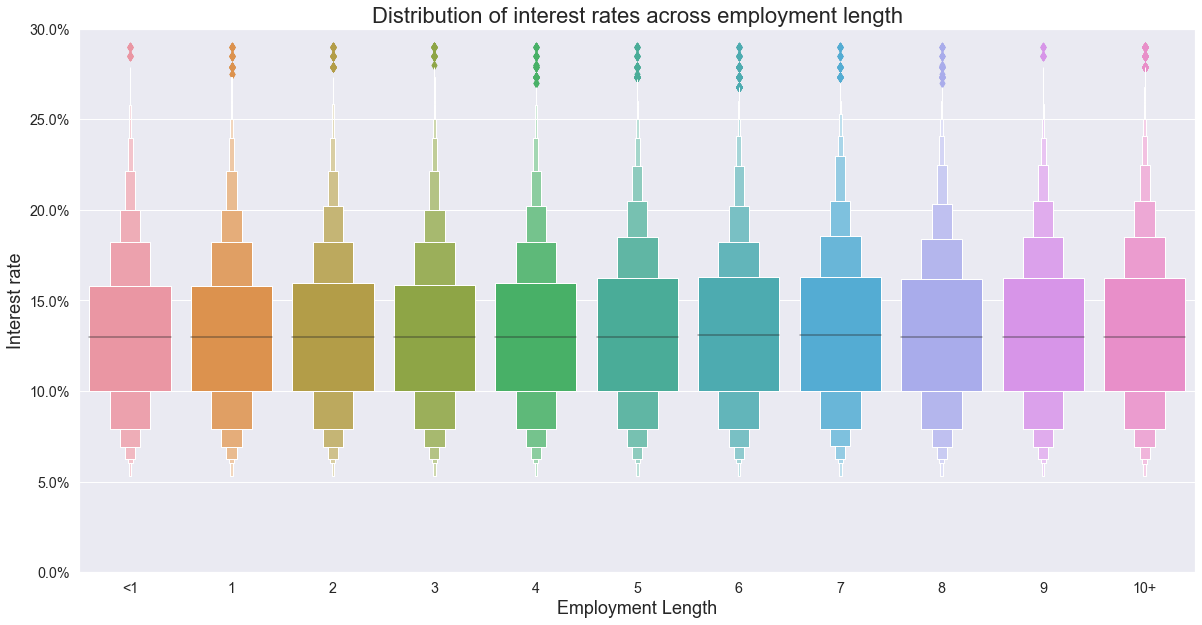

In [178]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title('Distribution of interest rates across employment length', size = 22)

sns.catplot(x="emp_length", y="int_rate", kind='boxen', data=df_r, ax=ax1)
ax1.set_ylim(0, 30)
ax1.set_xlabel('Employment Length', size = 18)
ax1.set_ylabel('Interest rate', size = 18)
formatter = FuncFormatter(percentage)
ax1.yaxis.set_major_formatter(formatter)
ax1.set_xticks(emp_length)
ax1.set_xticklabels(['<1','1','2','3','4','5','6','7','8','9','10+'])
plt.close('all')
fig

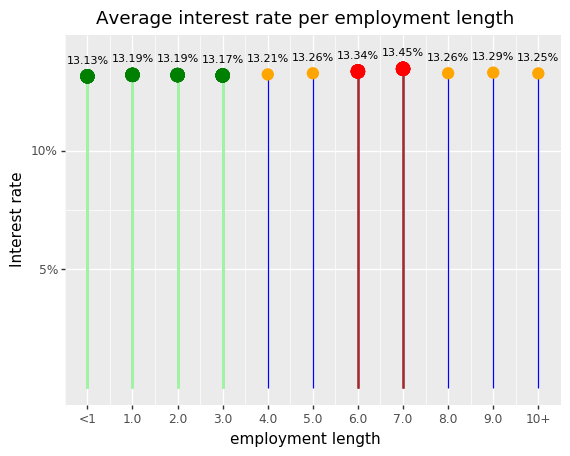

<ggplot: (-9223371869196005688)>

In [210]:
g = (ggplot(df_rg, aes(x='employment length', y='int_rate')) 
     + geom_segment(aes(y=0, x='employment length', yend = 'int_rate', xend = 'employment length'), color = "blue")) +\
geom_point(color = "orange", size = 4)
g + scale_x_continuous(breaks = df_rg['employment length']) +labs(y = "Interest rate") +\
labs(title = "Average interest rate per employment length") +\
geom_text(aes(label='Interest rate'), size=8, nudge_y  = 0.7) +\
geom_segment(aes(y=0, x = 6, yend = 13.336904, xend = 6), color = "brown") +\
geom_segment(aes(y=0, x = 7, yend = 13.446725, xend = 7), color = "brown") +\
geom_segment(aes(y=0, x = 0, yend = 13.132287, xend = 0), color = "palegreen") +\
geom_segment(aes(y=0, x = 1, yend = 13.191436, xend = 1), color = "palegreen") +\
geom_segment(aes(y=0, x = 2, yend = 13.185467, xend = 2), color = "palegreen") +\
geom_segment(aes(y=0, x = 3, yend = 13.168425, xend = 3), color = "palegreen") +\
geom_point(x = 6, y = 13.336904, color = "red", size = 4.8) +\
geom_point(x = 7, y = 13.446725, color = "red", size = 4.8) +\
geom_point(x = 0, y = 13.132287, color = "green", size = 4.8) +\
geom_point(x = 1, y = 13.191436, color = "green", size = 4.8) +\
geom_point(x = 2, y = 13.185467, color = "green", size = 4.8) +\
geom_point(x = 3, y = 13.168425, color = "green", size = 4.8) +\
scale_y_continuous(breaks = [5, 10], labels=['5%', '10%']) +\
scale_x_continuous(breaks = range(0,11), labels=df_rg['emp_length'])

From the two graphs above, we can conclude that there are **no significant differences in the distributions of interest rates among borrowers with different employment lengths,** and that the differences in the average interest rate are minimal, with 7 years having the highest and less than one year the lowest. These results go completely against our expectations and are only partially in accordance with the default and charge off rates shown above. Average interest rates are higher for medium-high employment length, which makes sense since given that these were also performing worst in terms of default and charge off rate. However, the average interest rates are lower for borrowers with the least employment length and not for those with the highest. This not only goes against our expectations, but also against our previous findings, since people with higher employment lengths had, in general, lower default rates than those with less experience.

# Home Ownership

For the variable home_ownership, there are 3 possible values we can take conclusions from. These are **Mortgage, Own or Rent.** We expect borrowers with a mortgage to have a higher probability of default and of being charged off, since they are more debt burdened. In contrast, we also expect borrowers who rent to have a higher probability of default than homeowners, since we suspect this last group to be better off. 

In [181]:
hodefault = df[['home_ownership', 'loan_status']]
hodefault1 = hodefault.loc[hodefault['loan_status'] == 'Default']
hodefault2 = hodefault.loc[hodefault['loan_status'] == 'Charged Off']
hodefault1 = hodefault1.groupby(['home_ownership']).count()
hodefault2 = hodefault2.groupby(['home_ownership']).count()
hodefault1['home_ownership'] = hodefault1.index
hodefault1['charge_off'] = hodefault2['loan_status']
hodefault1.index = range(0,3)
hodefault1 = hodefault1.rename(columns={'loan_status': 'default'})

hoall = df[['home_ownership', 'loan_status']]
hoall = hoall.groupby(['home_ownership']).count()
hoall['home_ownership'] = hoall.index
hoall.index = range(0,6)

test_df = pd.merge(hodefault1,hoall, on='home_ownership', how = 'left')
test_df['Probability_of_Default'] = (test_df['default']*100 / test_df['loan_status'])
test_df['Probability_of_charge_off'] = (test_df['charge_off']*100 / test_df['loan_status'])
df_1 = df[['home_ownership', 'int_rate']]
df_2 = df_1.groupby(['home_ownership']).mean()
df_2['home_ownership'] = df_2.index
df_2.index = range(0,6)

df_3 = pd.merge(test_df, df_2, on = 'home_ownership', how = 'left')

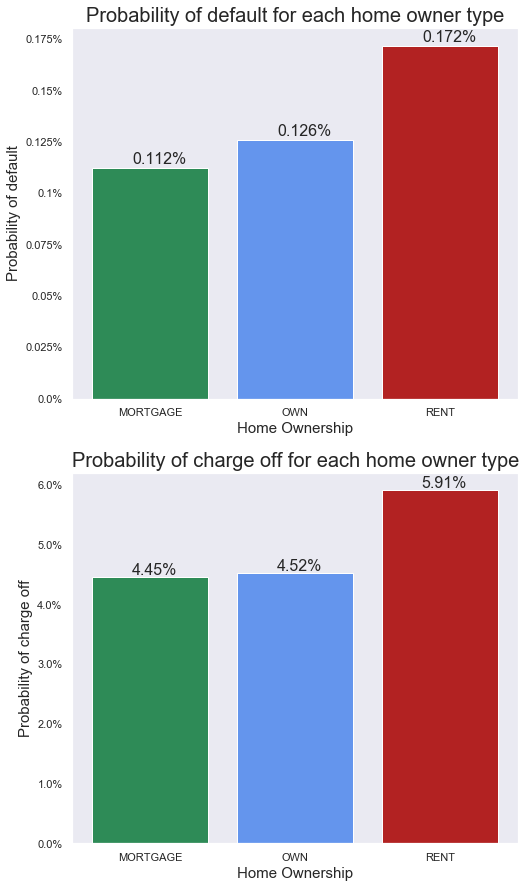

In [312]:
home_ownwership = df_3['home_ownership']
probability_of_default = df_3['Probability_of_Default']
probability_of_charge_off = df_3['Probability_of_charge_off']

fig, ax = plt.subplots(2,1,figsize=(8, 15))

ax[0].bar(home_ownwership, probability_of_default, color = ['seagreen', 'cornflowerblue', 'firebrick'])
ax[1].bar(home_ownwership, probability_of_charge_off, color = ['seagreen', 'cornflowerblue', 'firebrick'])

ax[0].set_title('Probability of default for each home owner type', fontsize=20)
ax[0].set_xlabel('Home Ownership', fontsize=15)
ax[0].set_ylabel('Probability of default', fontsize=15)

ax[1].set_title('Probability of charge off for each home owner type', fontsize=20)
ax[1].set_xlabel('Home Ownership', fontsize=15)
ax[1].set_ylabel('Probability of charge off', fontsize=15)


for prb in probability_of_default:
    ax[0].text(0 - 0.12 + list(probability_of_default).index(prb),prb + 0.002, percentage2(round(prb,3)), fontsize=16)

for co in probability_of_charge_off:
    ax[1].text(0 - 0.13 + list(probability_of_charge_off).index(co),co + 0.04, percentage2(round(co, 2)), fontsize=16)



formatter = FuncFormatter(percentage)
ax[0].yaxis.set_major_formatter(formatter)
ax[1].yaxis.set_major_formatter(formatter)

ax[0].grid(False)
ax[1].grid(False)

From the visualization above, we can observe that **borrowers with mortgages are actually  the ones with the lowest probabilities of default, and that there is a significant difference between the default and charge off rates of people who rent and those who don’t.** While the result for borrower who rent was somewhat expected, the results for people with mortgages surprised us. One possible explanation for this is that people with mortgages need to be much more careful with their credit score, and so are more prudent when taking loans, and have higher incentives to pay them back.

As for the interest rates, we expect lending club to be aware of these differences and charge higher interest rates to borrowers with a mortgage and lower rates to homeowners, with the average rates of people who rent between the two.

In [183]:
dfh = df.loc[(df['home_ownership'] == 'MORTGAGE') | (df['home_ownership'] == 'OWN') | (df['home_ownership'] =='RENT')]

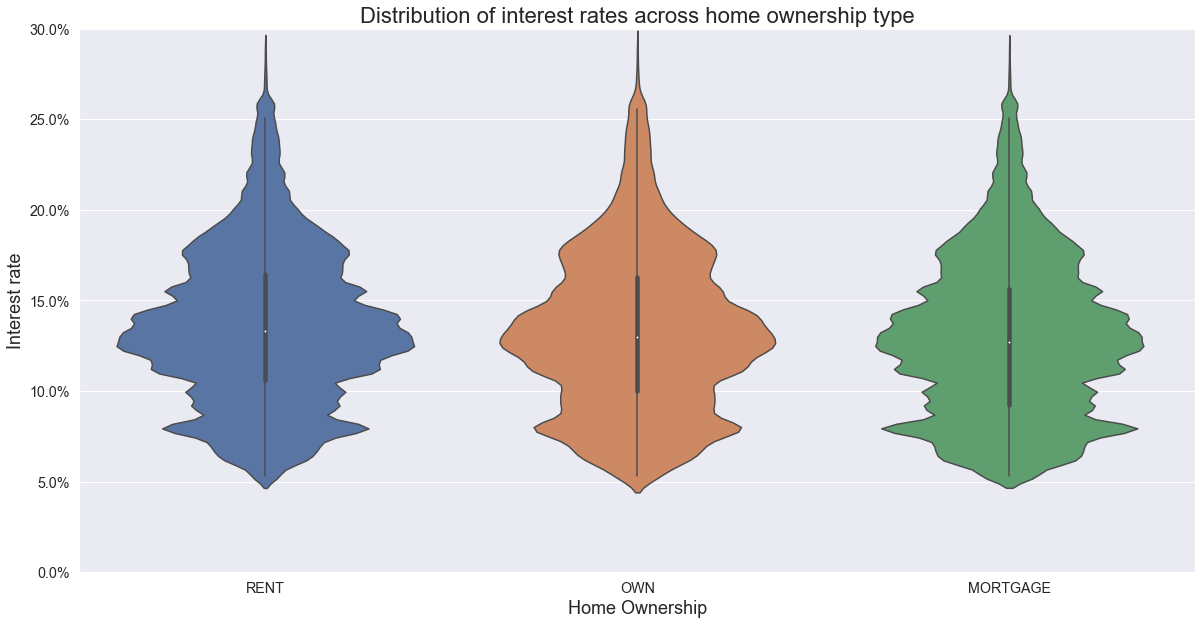

In [184]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title('Distribution of interest rates across home ownership type', size = 22)

sns.catplot(x="home_ownership", y="int_rate", kind='violin', data=dfh, ax=ax1)
ax1.set_ylim(0, 30)
ax1.set_xlabel('Home Ownership', size = 18)
ax1.set_ylabel('Interest rate', size = 18)
formatter = FuncFormatter(percentage)
ax1.yaxis.set_major_formatter(formatter)
plt.close('all')
fig

In [185]:
dfh = dfh[['home_ownership', 'int_rate']]
dfh2 = dfh.groupby(['home_ownership']).mean()
dfh2['home_ownership'] = dfh2.index
dfh2.index = range(0,3)
dfh2['Interest rate'] = [percentage2(round(x,3)) for x in dfh2['int_rate']]

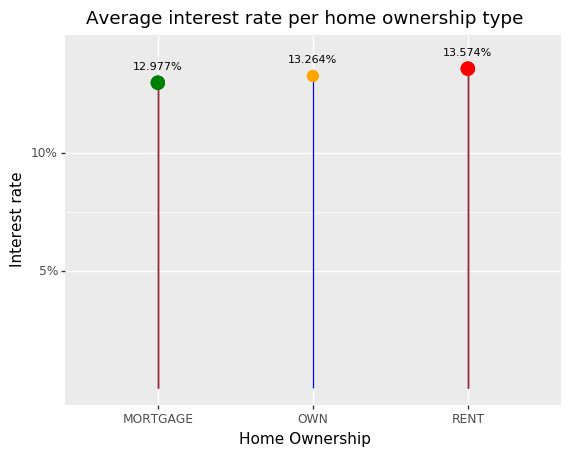

<ggplot: (168017428463)>

In [186]:
g = (ggplot(dfh2, aes(x='home_ownership', y='int_rate')) 
     + geom_segment(aes(y=0, x='home_ownership', yend = 'int_rate', xend = 'home_ownership'), color = "blue")) +\
geom_point(color = "orange", size = 4)
g + labs(title = "Average interest rate per home ownership type") +\
scale_y_continuous(breaks = [5, 10], labels=['5%', '10%']) +\
labs(y = "Interest rate") +\
labs(x = "Home Ownership") +\
geom_text(aes(label='Interest rate'), size=8, nudge_y  = 0.7) +\
geom_segment(aes(y=0, x=1, yend = 12.977, xend = 1), color = "brown") +\
geom_point(x = 1, y = 12.977, color = "green", size = 4.8) +\
geom_segment(aes(y=0, x=3, yend = 13.574, xend = 3), color = "brown") +\
geom_point(x = 3, y = 13.574, color = "red", size = 4.8)

From the two graphs above, we can see that even though there is no significant difference between the distribution of interest rates across people with different home ownership type, there are differences in their average interest rates. People who rent have the highest average interest rate of the three types of borrowers, while people with mortgages have the lowest. This goes partially against our expectations, but it is in accordance with our previous findings, as average interest rates are increasing with the probability of default and of being charged off for each group. One thing to note is that despite the differences in probabilities of default and charge off being very small between people with mortgages, the difference in average interest rate between the two is about the same as between homeowners and people who rent, while this last group is significantly more likely to default. This may indicate that Lending club is either giving lower interest rates to people with mortgages than what the riskiness of their loan should represent, or that they are charging rates too high to homeowners.

# Derogatory Public Records

Another important variable to analyse is pub_rec, which denotes the amount of derogatory public records for that borrower. **Derogatory public records are negative information on your credit report that lowers your credit score. This information is made public so that lending firms may have less risk when providing credit to a borrower.** 
By analysing the amount of derogatory public records the borrower has, we can understand the effects that this variable may have on the likelihood of default or charge off. 
First, we need to realise that, from our dataset, the vast majority of people have no derogatory public records. Considering the amount of records of people with one or more public records, it doesn’t make sense to analyse data with more than four public records, so we’ll just group them into a particular category.

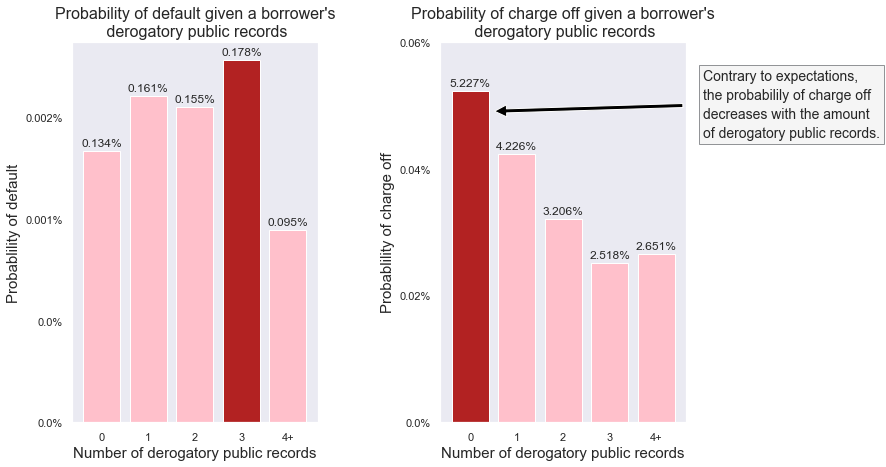

In [306]:
df['default']= np.where(df['loan_status']=='Default', True, False)
df['charged_off']= np.where(df['loan_status']=='Charged Off', True, False)
df['pub_rec_1']= np.where(df['pub_rec']>=4, 4, df['pub_rec'])
s = df.groupby('pub_rec_1')['default'].mean().reset_index()
p = df.groupby('pub_rec_1')['charged_off'].mean().reset_index()
p.ix[0,1]


formatter = FuncFormatter(percentage)

sns.set()
#gs = gridspec.GridSpec(3, 3)
fig, ax = plt.subplots(1,2,figsize=(11, 7))
plt.subplots_adjust(wspace=0.5)
t =ax[0].bar(s.ix[:,0], s.ix[:,1], color ='pink')
ax[0].bar(s.ix[3,0], s.ix[3,1], color ='firebrick')
#ax[0].plot(s.ix[:,0], s.ix[:,1], color ='red', marker='o', alpha=0.4)
ax[0].set_xlabel('Number of derogatory public records', fontsize=15)
ax[0].set_ylabel('Probablility of default', fontsize=15)
ax[0].set_yticks(np.arange(0,0.002, step =0.0005))
ax[0].set_title("Probability of default given a borrower's\n derogatory public records", fontsize =16)
ax[0].set_xticklabels(['0','0','1','2','3','4+'])
ax[0].yaxis.set_major_formatter(formatter)
ax[0].grid(False)

def autolabel(rects,i):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax[i].annotate('{:.3%}'.format(round(height,5)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(t,0)

r = ax[1].bar(p.iloc[:,0], p.iloc[:,1], color ='pink')
e = ax[1].bar(p.ix[0,0], p.ix[0,1], color ='firebrick')
#ax[1].plot(p.ix[:,0], p.ix[:,1], color ='red', marker='o')
ax[1].set_xlabel('Number of derogatory public records', fontsize=15)
ax[1].set_ylabel('Probablility of charge off', fontsize=15)
ax[1].set_yticks(np.arange(0,0.07, step =0.02))
ax[1].set_xticklabels(['0','0','1','2','3','4+'])
ax[1].set_title("Probability of charge off given a borrower's\n derogatory public records", fontsize =16)
ax[1].yaxis.set_major_formatter(formatter)
ax[1].grid(False)

ax[1].text(5, 0.045,
         'Contrary to expectations, \nthe probabilily of charge off \ndecreases with the amount \nof derogatory public records.',
         fontsize=14,
         linespacing=1.45,
        bbox={'facecolor': 'whitesmoke',  # background color
               'pad': 4,  # add more padding
               'edgecolor': '#929497'})  # no border
ax[1].annotate('',xy=(0.3, 0.049), xytext=(4.8, 0.05),
            arrowprops=dict(facecolor='black', shrink=0.05) )

autolabel(r,1)

From these graphs, we can analyse the probability of default and charge off given the borrower’s number of derogatory public records. The default graph adds up to what would be expected, with a **higher probability of default for people with a higher number of derogatory public records.** The probability of charge off number, however, seems a little counter intuitive. **People with no derogatory public records are more likely to charge off.** This may be due to tighter control on loans being attributed to people with public records, which reduces the chance of charge off, while borrowers who appear to be capable of paying it back may, in fact, not be. This illustrates the information asymmetry problem inherent in loan lending, given that the borrower always knows more about his own financial condition than the lender and certain aspects may not be taken into consideration when providing a loan.

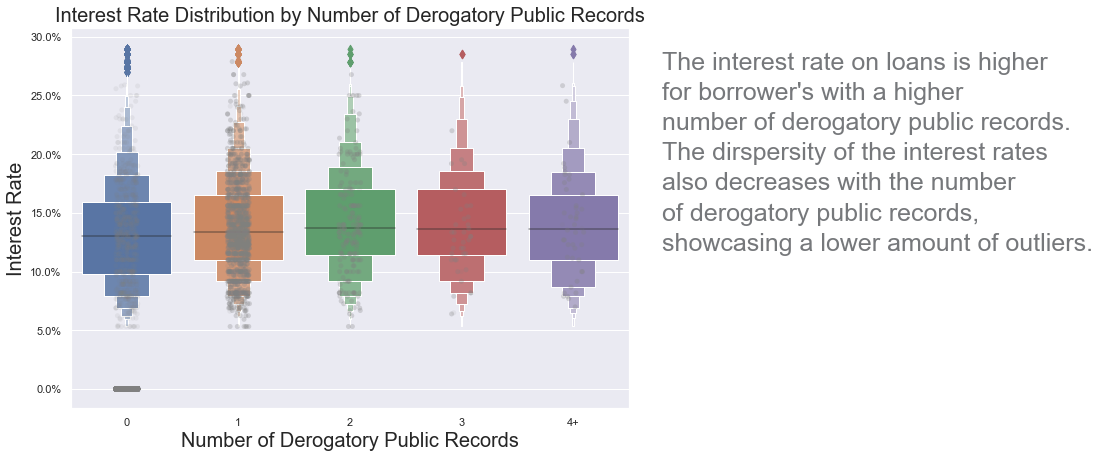

In [299]:
q = pd.pivot_table(data=df, columns=['pub_rec_1'], index = df.index,values = ['int_rate'])
fig, ax = plt.subplots(1,1,figsize=(10, 7))

sns.set(font_scale=1)
g =sns.boxenplot(data=q)

p = q.sample(frac=0.0008)
q.iloc[:,0]=0
g = sns.stripplot(data=q.sample(frac=0.01), alpha=.28, color= 'gray')
g = sns.stripplot(data=p, alpha=.1, color= 'gray')
g.set(xticklabels=['0','1','2','3', '4+'], )
g.set_xlabel('Number of Derogatory Public Records', fontsize =20)
g.set_ylabel('Interest Rate', fontsize=20)
g.set_title('Interest Rate Distribution by Number of Derogatory Public Records', fontsize = 20)
ax.text(4.8, 11.8,
         "The interest rate on loans is higher \nfor borrower's with a higher\nnumber of derogatory public records."
         " \nThe dirspersity of the interest rates\nalso decreases with the number"
        " \nof derogatory public records, \nshowcasing a lower amount of outliers.",
         fontsize=25, color='#76787B', linespacing=1.4)

def percentage(x, pos):
    return f'{round(x,3)}%'
formatter = FuncFormatter(percentage)

ax.yaxis.set_major_formatter(formatter)

From the presented graph, we can tell that **the more derogatory public records the borrower has, the higher the interest rate** that will be charged. This makes sense, considering that these records represent a form of risk for the company and therefore, should be acknowledged in the interest payment. Furthermore, we also see less outliers for borrowers with a high amount of derogatory public records, indicating the lower dispersity of these loans. This also makes sense, considering that the lenders will not be be willing to move from the 

# Loan amount

We are now interested in seeing how LC’s grading system works in relation to this variable. As we concluded from our introduction, bad gradings result in significantly high interest rates. Therefore we would expect that people with bad gradings tend to favor lower loan amounts, because big loan amounts together with high interests would result in a major financial burden for the borrower.

Text(0.5, 0.98, 'Loan Amount Distribution per Grade')

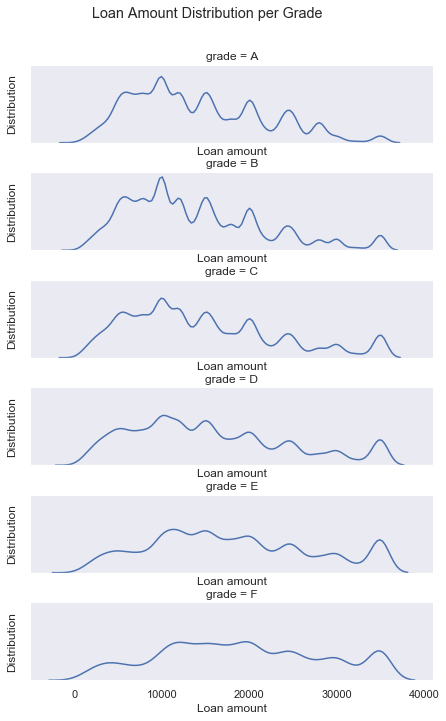

In [205]:
grade_order = ['A','B','C','D','E','F']
sns.set_style("dark")
g = sns.FacetGrid(db, row="grade", row_order = grade_order,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "loan_amnt", hist=False, rug=False);
g.set(xlabel='Loan amount')
g.set(ylabel='Distribution')
#set_axis_labels('loan_amnt' = 'ggg')
plt.subplots_adjust(top=0.9)
g.despine(left=True)
g.set(yticklabels=[])
g.fig.suptitle('Loan Amount Distribution per Grade')

In the above figure we actually find a contrary result. **The Loan amount distribution shifts from a positive skew for higher grades to a more even distribution at lower grades, implying lower grades have higher loan amounts.**  Alternatively, this could mean that people with lower possibility of paying off a loan tend to borrow more money than people with better means to do so, which is quite surprising for us. Nevertheless, considering that loans with higher loan amount actually are the less risky ones, this grading system could be flawed since higher loan amounts seem to have a higher impact on one’s grade when the default rates indicate the opposite. Therefore, we highly recommend lending club to revise how this variable impacts the grading as there could be several other factors that we have missed or that we didn’t take into account. and that the grade attributed to a loan decreases as the loan amount increases, keeping all other variables constant.

# Conclusion 

Since the first time we got a hold on our dataset, we were able to vastly improve the information that it had, so that actual conclusions could be extracted from it. The main focus of our analysis was on finding variables that were explanatory of what would cause a borrower to deafult. Our main findings from this analysis included:

- Annual Income has tepid effect on interest rates, although the higher the income level, the lower the probability of default or charge off.
- People with high employment length have lower probability of default or charge off, even though there anomalies to this rule.
- Employment length tends to have little to no effect on the interest rate of each loan, as the rates seem to be quite fixed overall.
- Home ownership showcased to be predictive variable for possible default or charge off. People who are are much more likely to default or charge off on their loan, while those with mortagues were less likely to reach those status.
- The probability of default seemed to increase with the amount of derogatory public records. However, when it comes to probability of charge off, the results seem counter intuitive. This showcases the information asymmetry issue inherent in the money lending business. 
- The loan amount tends to increase with the grade of each loan, showcasing that borrowers who take loans with lower grades also tend to be the ones who need money the most. 
- Based on these finding, Lending Club should probably revise how it assesses grades and/or interest rates for each loan based on the variables anual income, home ownership and employment lenght.

**Limitations**

Even though our analysis did result in some interesting and unexpected findings, we also need to acknowledge the obvious limitations we had with this dataset. 
Firstly, we focused on what would lead a borrower to default, even though *the number of records of loans defaulted was incredibly low with just 1219 records on the entire dataset.* This put a huge constraint on our results, since there might not be representative data for us to make great conclusions what would cause a borrower to default. 

Furthermore, if we look on the firm's website, we can find what the firm dictates affects their interest rate. Here is an example of some variables:

(source: https://www.lendingclub.com/loans/resource-center/what-affects-my-credit-score-interest-rate)

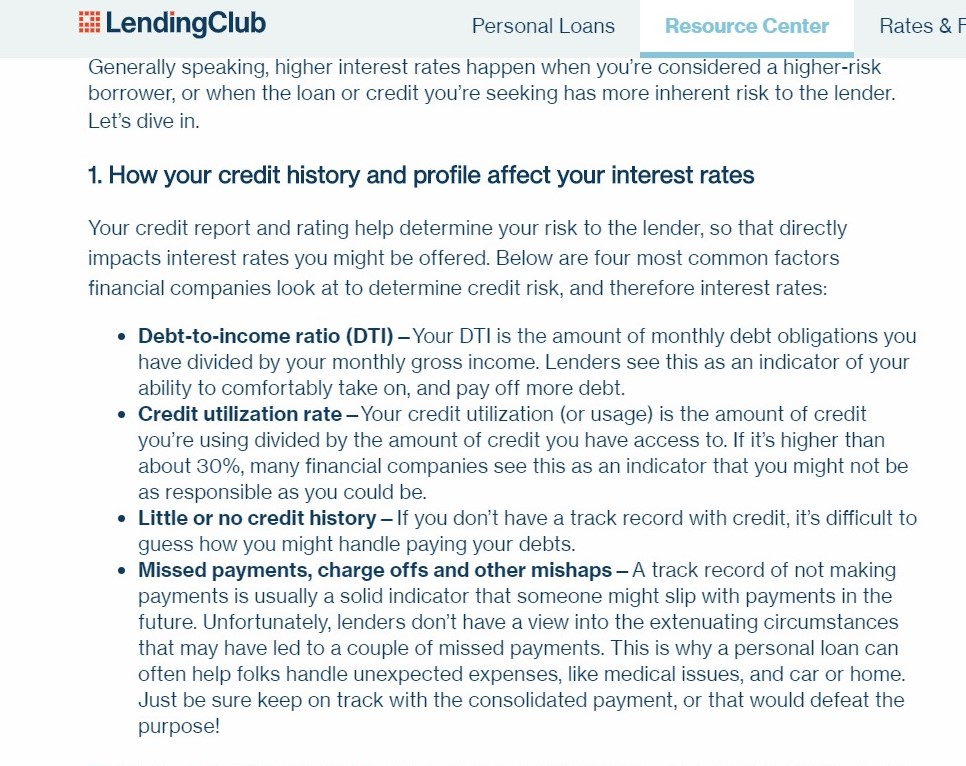

In [311]:
Image(filename = "int_rates.jpeg", width=800, height=500)

Considering important variables like credit history had very little representation on our dataset and the ones we did analyse, such as derogatory public records, contained counter intuitive results, it may be that certain aspects of this dataset need better representation.

**Next steps**

As far as the next steps to go with this analysis, we would suggest applying the same type of analysis to other variables in the data set. Furthermore, we also suggest getting more data from other peer-to-peer lending firms in order to compare if the most unexpected findings we got from this analysis are similar in other firms in this industry. Moreover, we also think it would be important to get more variables that dictate a borrower's history, since information asymmetry seems to be a problem in this firm, which can lead to some very troublesome decisions. Finally, we would like to explore more the reasons that lead the firm to concead such high amounts on poorly graded loans. Could it be there are some advantages on providing credit that is not likely to paid back? Are those practices fair to the borrower?

As a last remark, we would like to reiterate that many of the conclusions taken on this assignment are restricted by the dataset that we had and may not be applicable to the real world issues this firm and the industry in general faces. Nevertheless, it does bring out some concerns that are worthwhile keeping in mind when managing credit and dealing with the money lending business.